###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

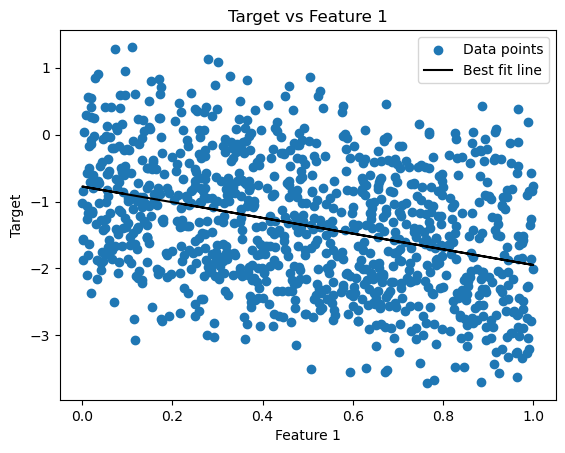

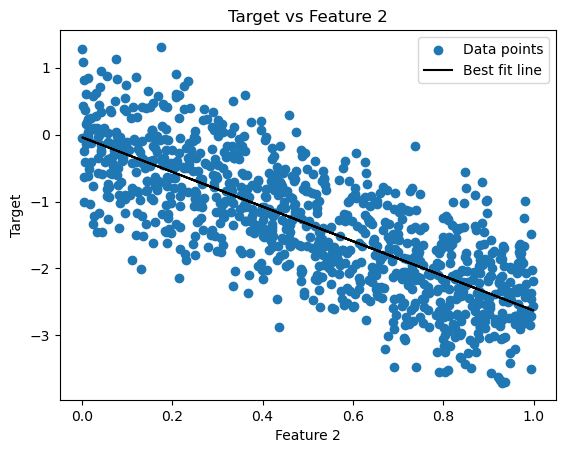

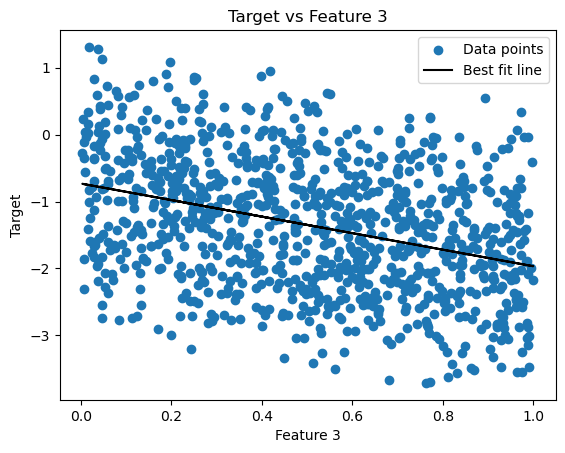

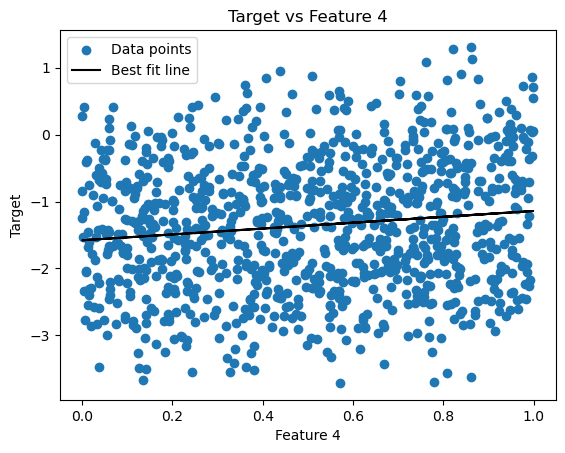

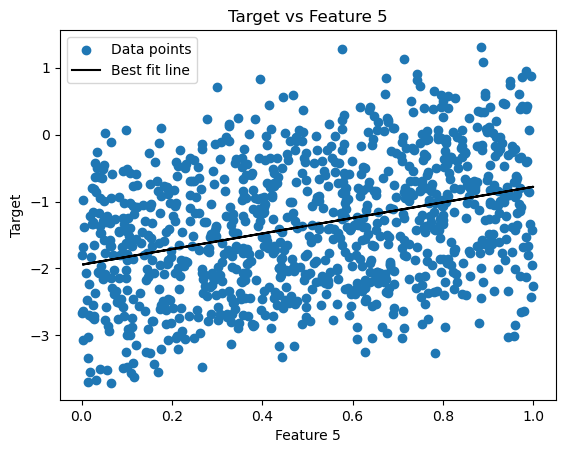

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(5)
X = np.random.rand(1000, 5)
true_coefficients = np.random.randn(5)
true_intercept = np.random.randn()
y = X.dot(true_coefficients) + true_intercept + np.random.randn(1000) * 0.1

for i in range(5):
    feature = X[:, i]
    
    model = LinearRegression()
    model.fit(feature[:, np.newaxis], y)
    
    y_pred = model.predict(feature[:, np.newaxis])
    
    plt.scatter(feature, y, label='Data points')
    plt.plot(feature, y_pred, color='black', label='Best fit line')
    plt.title(f'Target vs Feature {i+1}')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.legend()
    plt.show()


### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

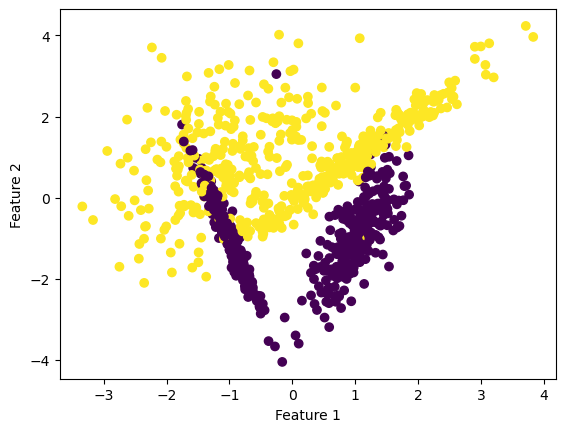

In [18]:
from sklearn.datasets import make_regression as mr
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=2)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.ylabel('Feature 2')
plt.xlabel('Feature 1')
plt.show()

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

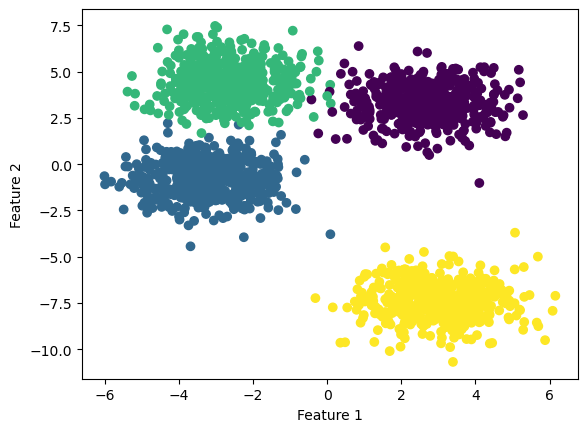

In [23]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=2000, centers=4, n_features=2)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [24]:
import requests as req
url = 'https://www.worldometers.info/coronavirus/'
page= req.get(url)
print(page.status_code)

200


In [26]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.text, 'lxml')

In [27]:
table = soup.find('table', class_='main_table_countries_today')
print(table)

None


<h3>I was unable to find the table

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

In [38]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [103]:
X, y = make_classification(n_samples=1000, n_features=2,n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=[0.955, 0.045], random_state=50)

                           

In [110]:
#checking the data
class_counts = Counter(y)
minority_class = min(class_counts, key=class_counts.get)
print(f"{class_counts}")
print(f"Minority class ({minority_class}): {class_counts[minority_class]/len(y)*100:.2f}%")




Counter({0: 950, 1: 50})
Minority class (1): 5.00%


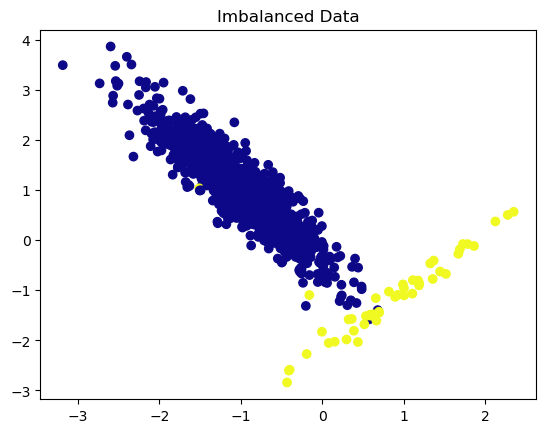

In [105]:
#plotting the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="plasma")
plt.title("Imbalanced Data")
plt.show()


In [106]:
# over sampling of the data
smote = SMOTE(sampling_strategy={minority_class: 5 * class_counts[minority_class]})
X_smote, y_smote = smote.fit_resample(X, y)

In [107]:
class_counts_smote = Counter(y_smote)
print(f"Class distribution after SMOTE: {class_counts_smote}")

Class distribution after SMOTE: Counter({0: 950, 1: 250})


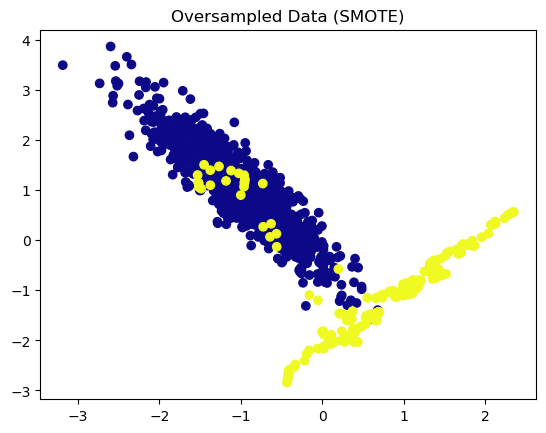

In [108]:
plt.scatter(X_smote[:, 0], X_smote[:, 1], c=y_smote, cmap="plasma")
plt.title("Oversampled Data")
plt.show()

In [115]:
# undersampling of the data
class_counts = Counter(y)
minority_class = min(class_counts, key=class_counts.get)
majority_class = max(class_counts, key=class_counts.get)
rus = RandomUnderSampler(sampling_strategy={majority_class: len(y) - 150})
X_under, y_under = rus.fit_resample(X, y)

In [116]:
desired_majority_samples = 3 * class_counts[minority_class]
rus = RandomUnderSampler(sampling_strategy={majority_class: desired_majority_samples})
X_under, y_under = rus.fit_resample(X, y)

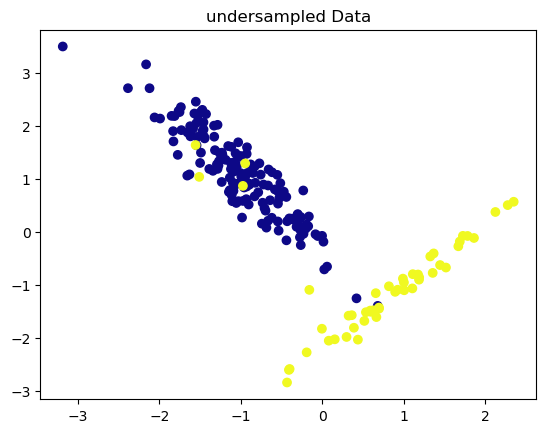

In [117]:
#plotting the data
plt.scatter(X_under[:, 0], X_under[:, 1], c=y_under, cmap="plasma")
plt.title("undersampled Data")
plt.show()

##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [123]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
X=iris.data
y=iris.target
df= pd.DataFrame(X,columns=iris.feature_names)
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [125]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

if missing_values.any():
    df.dropna(inplace=True)
    print("Missing values handled. Dataframe shape after handling:", df.shape)
else:
    print("No missing values found in the Dataframe.")


No missing values found in the Dataframe.


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (105, 4)
Shape of X_test: (45, 4)
Shape of y_train: (105,)
Shape of y_test: (45,)


In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

print("Mean of scaled data:", X_train_scaled.mean(axis=0))
print("Standard deviation of scaled data:", X_train_scaled.std(axis=0))


Mean of scaled data: [ 2.57148800e-15 -9.89254974e-16 -2.91830052e-16  1.20538500e-16]
Standard deviation of scaled data: [1. 1. 1. 1.]


In [132]:

X_test_scaled = scaler.transform(X_test)

print("Mean of scaled testing data:", X_test_scaled.mean(axis=0))
print("Standard deviation of scaled testing data:", X_test_scaled.std(axis=0))


Mean of scaled testing data: [ 0.00191396  0.38225283 -0.21885019 -0.17909278]
Standard deviation of scaled testing data: [0.98372727 1.08786096 1.07188971 1.07942751]


In [134]:
print(X_test_scaled[:5])

[[ 0.3100623  -0.50256349  0.484213   -0.05282593]
 [-0.17225683  1.89603497 -1.26695916 -1.27039917]
 [ 2.23933883 -0.98228318  1.76840592  1.43531914]
 [ 0.18948252 -0.26270364  0.36746819  0.35303182]
 [ 1.15412078 -0.50256349  0.54258541  0.2177459 ]]
